This is a script for comparing the post-processing performance (test RMSE) between using proportions of members forecasting each visibility index and using ensemble means and standard deviations of ensemble visibility forecasts as inputs. Please refer to Section 3.2.1 for more information on the selection of ensemble information. Figure 4.1 in the report is produced by this script.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
# Change paths for own use
ROOT = "ROOT/"
data_path = ROOT+"raw_data_EUPPBench/"
result_path = ROOT+"trained_models/lead_time_continuous/"

In [3]:
# Results df (using ensemble means and std of visibility forecasts as inputs)
df_test_result = pd.read_csv(result_path + "results_giant_20_300.csv")
test_error_rf = df_test_result['error_rf']

# Results df (using proportions of members forecasting each visibility index as inputs)
df_test_result_prop = pd.read_csv(result_path + "results_giant_20_300_prop.csv")
test_error_rf_prop = df_test_result_prop['error_rf']

/Users/clifflau/opt/anaconda3/lib/python3.8/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


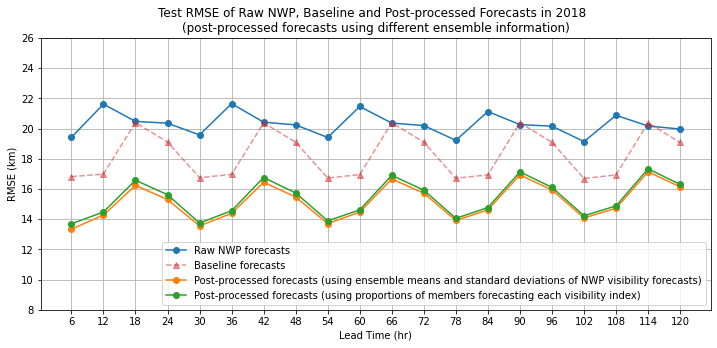

In [4]:
## Plot test RMSE by lead time
import xarray as xr
vis_forecast_obs = xr.open_dataarray(data_path + "vis_forecast_observations.nc")
lead = np.array(vis_forecast_obs['forecast_period'][1:])
lead_hr = np.array(lead*10**-9/3600, dtype='int')

rmse_rf = []
rmse_rf_prop = []
rmse_forecast = []
rmse_baseline = []

for l in lead_hr:
    df_result_lead = df_test_result[df_test_result['lead_hr']==l]
    rmse_rf.append(np.sqrt(np.mean(test_error_rf[df_test_result['lead_hr']==l]**2)))
    rmse_rf_prop.append(np.sqrt(np.mean(test_error_rf_prop[df_test_result_prop['lead_hr']==l]**2)))
    rmse_forecast.append(np.sqrt(np.mean(df_result_lead['error_nwp']**2)))
    rmse_baseline.append(np.sqrt(np.mean(df_test_result[df_test_result['lead_hr']==l]['error_baseline']**2)))

rmse_rf = np.array(rmse_rf)/1000
rmse_rf_prop = np.array(rmse_rf_prop)/1000
rmse_forecast = np.array(rmse_forecast)/1000
rmse_baseline = np.array(rmse_baseline)/1000

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(lead_hr, rmse_forecast, 'o-', label='Raw NWP forecasts')
ax1.plot(lead_hr, rmse_baseline, '^--', label='Baseline forecasts', c='tab:red', alpha=0.5)
ax1.plot(lead_hr, rmse_rf, 'o-', label='Post-processed forecasts (using ensemble means and standard deviations of NWP visibility forecasts)', c='tab:orange')
ax1.plot(lead_hr, rmse_rf_prop, 'o-', label='Post-processed forecasts (using proportions of members forecasting each visibility index)', c='tab:green')
ax1.set_ylim(8,26)
plt.grid()
ax1.set_xticks(lead_hr)
ax1.set_xlabel("Lead Time (hr)")
ax1.set_ylabel("RMSE (km)")
ax1.set_title("Test RMSE of Raw NWP, Baseline and Post-processed Forecasts in 2018  \n(post-processed forecasts using different ensemble information)")
ax1.legend(loc='lower right')